In [4]:
import numpy
import pandas
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt


* In 1999, computer vision researchers figured out a better way to represent images using statistics of image patches: the Scale Invariant Feature Transform (SIFT) 

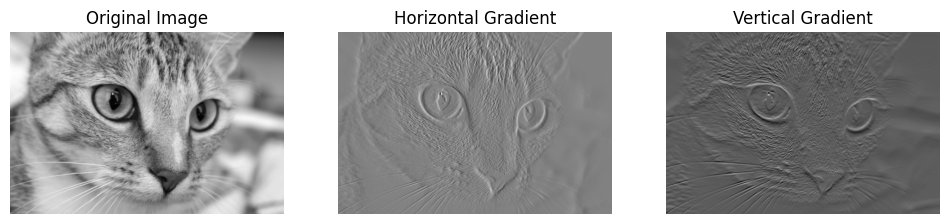

In [6]:
import numpy as np
from skimage import data, color
import matplotlib.pyplot as plt

# Load the example image and turn it into grayscale
image = color.rgb2gray(data.chelsea())

# Compute the horizontal gradient using the centered 1D filter.
# This is equivalent to replacing each non-border pixel with the
# difference between its right and left neighbors. The leftmost
# and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

# Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

# plotting the original image and the vertical and horizontal gradients
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')
axes[1].imshow(gx, cmap='gray')
axes[1].set_title('Horizontal Gradient')
axes[1].axis('off')
axes[2].imshow(gy, cmap='gray')
axes[2].set_title('Vertical Gradient')
axes[2].axis('off')

plt.show()


* The HOG paper compares various gradient magnitude weighting schemes: the mag‐ nitude itself, its square or square root, binarized, or clipped at the high or low ends. The plain magnitude, without adornments, performed the best in the authors’ experi‐ ments.

* SIFT also uses the plain magnitude of the gradient. Additionally, it wants to avoid sudden changes in the feature descriptor resulting from small changes in the position of the image window, so it downweights gradients that come from the edges of the neighborhood using a Gaussian distance function measured from the window center.

In other words, the gradient magnitude is multiplied by 1 e -∥ p- p0∥2/2σ 2, where p is the 2πσ 2
location of the pixel that generated the gradient, p0 is the location of the center of the image neighborhood, and σ, the width of the Gaussian, is set to one-half the radius of the neighborhood.
SIFT also wants to avoid large changes in the orientation histogram resulting from small changes in the orientation of individual image gradients. So, it uses an interpo‐ lation trick that spreads the weight from a single gradient into adjacent orientation bins. In particular, the root bin (the bin that the gradient is assigned to) gets a vote of 1 times the weighted magnitude. Each of the adjacent bins get a vote of 1 – d, where d is the difference in histogram bin unit from the root bin.



### Sift artchitecture

* The SIFT pipeline requires quite a number of steps. HOG is slightly simpler but fol‐ lows many of the same basic steps, such as creating a gradient histogram and normal‐ ization. Figure 8-6 illustrates the SIFT architecture. Starting from a region of interest in the original image, we first divide the region into a grid. Each grid cell is then fur‐ ther divided into subgrids. Each subgrid element contains a number of pixels, and each pixel produces a gradient. Each subgrid element produces a weighted gradient estimate, where the weights are chosen so that gradients outside of the subgrid ele‐ ment can contribute. These gradient estimates are then aggregated into an orienta‐ tion histogram for the subgrid, where gradients can have weighted votes as described previously. The orientation histograms for each subgrid are then concatenated to form a long gradient orientation histogram for the entire grid. (If the grid is divided into 2 × 2 subgrids, then there will be 4 gradient orientation histograms to concate‐ nate into 1.) This is the feature vector for the grid, which then goes through a nor‐ malize–threshold–normalize process. First, the vector is normalized to have unit norm. Then, individual values are clipped to a maximum threshold. Finally, the thresholded vector is normalized again. This is the final SIFT feature descriptor for the image patch.

On the surface, the mechanism of stacked neural networks appears very different from the image gradient histograms of SIFT and HOG. But a visualization of AlexNet shows that the first few layers are essentially computing edge gradients and other simple patterns, much like SIFT and HOG. Subsequent layers combine local patterns into more global patterns. The end result is a feature extractor that is much more powerful than what came before.

Nearing the end, we can build on the intuition gained to better understand why the most straightforward and simple image features will not always be the most useful for performing tasks such as image classification. Instead of representing each pixel as an atomic unit, it is more important to consider the relationships pixels have with other pixels near them. We can adapt techniques developed for other tasks, such as SIFT and HOG, to better extract features across entire images by analyzing gradients in neighborhoods.
The next leap forward in recent years applies deep neural networks to computer vision to push feature extraction of images even further. The important thing to remember here is that deep learning stacks many layers of neural networks and trans‐ formations on top of each other. Some of these layers, when examined individually, begin to tease out similar features that can be identified as building blocks for human vision: defining lines, gradients, color maps.